In [47]:
#Importing the important libraies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
#geting data from url
house_dataset = pd.read_csv('house.csv',index_col=0)
house_dataset.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [17]:
#shape of dataset
house_dataset.shape

(645, 7)

In [24]:
house_dataset['Price']

1      62000
2      78000
3      58000
4      45000
5      45000
       ...  
644    45000
645    24800
646    45000
647    65000
648    36000
Name: Price, Length: 645, dtype: int64

In [18]:
 house_dataset.tail()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
644,1359.156,7,15,3,2,2,45000
645,377.148,4,10,1,1,1,24800
646,740.064,13,14,1,1,1,45000
647,1707.840,3,14,3,2,2,65000
648,1376.946,6,7,3,2,1,36000


In [19]:
house_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1 to 648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB


In [20]:
house_dataset.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [21]:
house_dataset.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [58]:
house_dataset.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [62]:
house_dataset.loc['Bedroom':'Living.Room']

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price


In [63]:
house_dataset.iloc[1]

Sqft            2134.8
Floor              5.0
TotalFloor         7.0
Bedroom            4.0
Living.Room        2.0
Bathroom           2.0
Price          78000.0
Name: 2, dtype: float64

C:\Users\SHIVA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

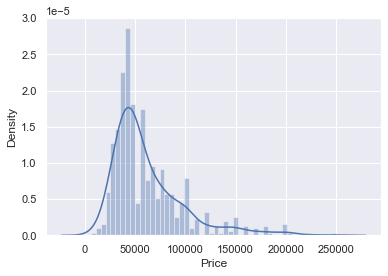

In [30]:
#outlier Detection in target variable Price
sns.set(rc = {'figure.figsize': (6,4)})
sns.distplot(house_dataset['Price'], bins =50)

In [38]:
#outlier removal
house_dataset.drop(house_dataset.index[list(np.where(house_dataset['Price']>90000))], inplace = True)


C:\Users\SHIVA\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


C:\Users\SHIVA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

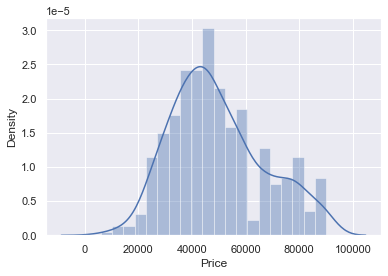

In [40]:
#outlier Detection in target variable Price
sns.set(rc = {'figure.figsize': (6,4)})
sns.distplot(house_dataset['Price'], bins =20)

In [41]:
#separating input and output featurs
X = house_dataset.drop('Price', axis = 1)
y = house_dataset['Price']

In [42]:
#MIN -MAx Scalling
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X = scaler.fit_transform(X)

In [45]:
#Train Test split
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.15, random_state = 5 )
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)
print('y train shape',y_train.shape)
print('y test shape',y_test.shape)
#test_size = .15 means 15% data go to test and 85% go to train

X train shape (461, 6)
X test shape (82, 6)
y train shape (461,)
y test shape (82,)


In [50]:
#Finding the optimal value of K
#loist of K
k_range = range(1,20)

#list to store scores
k_scores = []

#looping through value of k
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    scores = mean_squared_error(y_test, y_pred)
    k_scores.append(scores)
print(k_scores)

[113358968.62195122, 134714949.74085367, 145303896.28048784, 148139206.0442073, 151607830.5497561, 137605752.7987805, 139047799.84444997, 141028867.16730183, 142149671.36735922, 138516169.48999998, 133008090.09836727, 131832107.8762703, 133251878.9796507, 135412538.92608264, 138398745.63327911, 140049941.13724276, 140294319.59072492, 139858693.21642575, 140538132.30112833]


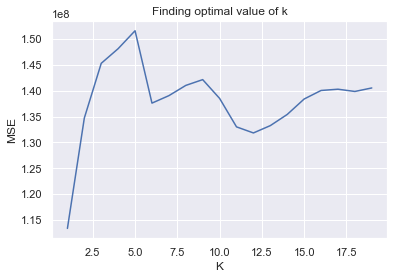

In [51]:
#plot
plt.plot(k_range, k_scores)
plt.title('Finding optimal value of k')
plt.xlabel('K')
plt.ylabel('MSE')
plt.show()

In [52]:
# here 4 is perfect optimal value of k
#k=4 is the optimal value of k
#Finding the optimal value of K
#loist of K
k_range = range(1,20)

#list to store scores
k_scores = []

#looping through value of k
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    scores = r2_score(y_test, y_pred)
    k_scores.append(scores)
print(k_scores)

[0.5006491133378006, 0.40657514427382946, 0.3599304022859331, 0.3474407469751388, 0.3321613143603239, 0.39384103873555776, 0.38748876260233767, 0.3787620801331041, 0.3738248918552195, 0.38983061602689095, 0.41409393071168044, 0.4192741804302669, 0.41302003073263904, 0.40350223542149366, 0.39034787291164963, 0.38307428927746323, 0.3819977922088067, 0.3839167441797371, 0.38092378726151865]


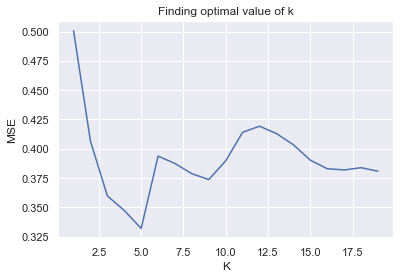

In [53]:
#plot
plt.plot(k_range, k_scores)
plt.title('Finding optimal value of k')
plt.xlabel('K')
plt.ylabel('MSE')
plt.show()

In [54]:
#k=1 is the optimal value of k
#Optimal model
knn = KNeighborsRegressor(n_neighbors = 1)
knn.fit(X_train , y_train)

KNeighborsRegressor(n_neighbors=1)

In [55]:
#taking the predictions
y_pred = knn.predict(X_test)

In [56]:
#Getting mean squared Error
mse = mean_squared_error(y_test, y_pred)
print('mean squared Error :',mse)

mean squared Error : 113358968.62195122


In [57]:
#Getting the r2 score
r2=r2_score(y_test, y_pred)
print('r2 scorer :',r2)

r2 scorer : 0.5006491133378006
